In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# 1. Load the Data and Initial Inspection

In [4]:
df = pd.read_csv('rating_short.csv')

In [14]:
df.head()

,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200


In [15]:
df.shape

(78245, 4)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
 3   date       78245 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [18]:
df.info

<bound method DataFrame.info of                userid   productid  rating        date
0      A1Z3YJF1S8Z1M3  B000M9ISQ2     5.0  1199750400
1       ALDXDYEGKB27G  B002L6HE9G     4.0  1331337600
2      A15LOGO6NBSI6B  B007MXGG5Q     5.0  1358640000
3      A23LX12CA3G4FG  B008HOEDYU     1.0  1385337600
4      A3TV7QFYXAG130  B0069R7TAM     5.0  1402963200
...               ...         ...     ...         ...
78240  A1TWH3KD5YJQHM  B0035ERKYW     5.0  1347321600
78241   AMXTPQY23TN07  B004RB8CT4     4.0  1367539200
78242  A1FCG75OIMKQCT  B002LTWDSK     2.0  1375315200
78243  A2X2NI89D5BQ2E  B004P1V8TM     5.0  1392768000
78244  A2VAZBUX99XIWP  B0001FTVEK     5.0  1357344000

[78245 rows x 4 columns]>

In [37]:
# 2. Drop the 'timestamp' column as requested
# The column is named 'date' in the CSV, so we drop 'date'

In [38]:
print("\nDropping 'date' column as requested in the project objective...")
# Check if the column exists to prevent future errors if run multiple times
if 'date' in df.columns:
    df = df.drop(columns=['date'])
print(f"New DataFrame Shape: {df.shape}")
print("-" * 50)


Dropping 'date' column as requested in the project objective...
New DataFrame Shape: (78245, 3)
--------------------------------------------------


In [39]:
# 3. Check for Missing Values and Data Types

In [42]:
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(df.isnull().sum())

No missing values found in the dataset.


In [43]:
# 4. Rating Descriptive Statistics and Distribution

In [44]:
print("\n--- Rating Descriptive Statistics ---")
print(df['rating'].describe())
print("-" * 50)


--- Rating Descriptive Statistics ---
count    78245.000000
mean         4.006454
std          1.385342
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64
--------------------------------------------------


C:\Users\rande\AppData\Local\Temp\ipykernel_2260\222550139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


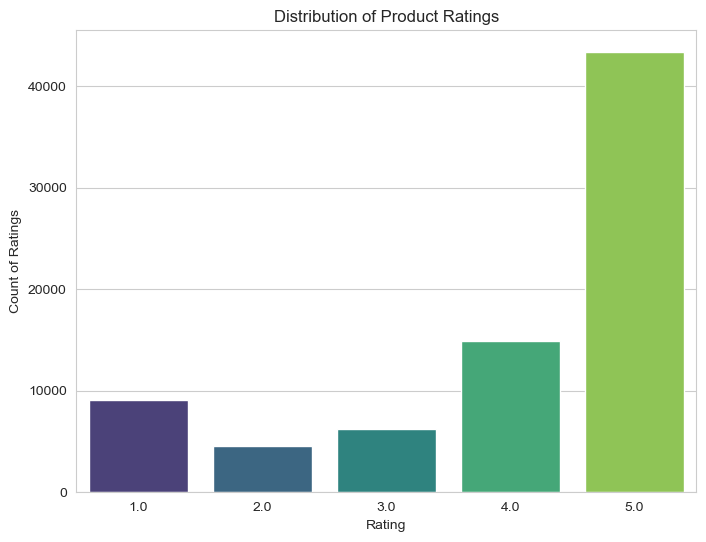

In [45]:
# Visualize rating distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')
plt.show()

In [46]:
# 5. User and Product Uniqueness Check

In [50]:
num_users = df['userid'].nunique()
num_products = df['productid'].nunique()
print("\n--- Unique User and Product Counts ---")
print(f"Total number of unique users: {num_users}")
print(f"Total number of unique products: {num_products}")


--- Unique User and Product Counts ---
Total number of unique users: 76430
Total number of unique products: 40228


In [48]:
#6. User Activity Analysis (Ratings per User)

In [51]:
user_counts = df['userid'].value_counts()
print("\n--- User Activity Analysis ---")
print(f"Mean number of ratings per user: {user_counts.mean():.2f}")
print("Top 10 users by number of ratings:")
print(user_counts.head(10))


--- User Activity Analysis ---
Mean number of ratings per user: 1.02
Top 10 users by number of ratings:
userid
A3LGT6UZL99IW1    8
A1ODOGXEYECQQ8    8
ADLVFFE4VBT8      7
ARBKYIVNYWK3C     7
A2AY4YUOX2N1BQ    6
AVPNQUVZWMDSX     6
A15QYHQH80W30L    6
A27TN8D0CZ8LUY    6
A5JLAU2ARJ0BO     5
A2J8T58Z4X15IO    5
Name: count, dtype: int64


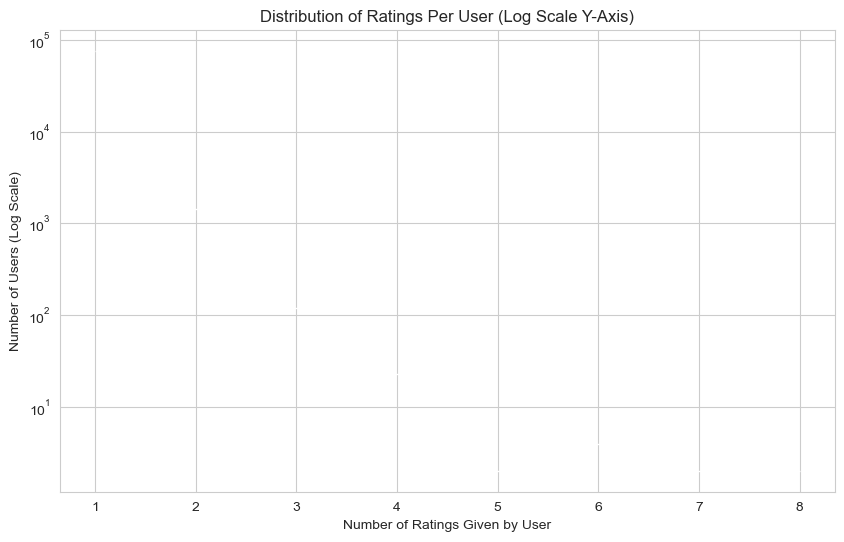

In [52]:
# Visualize the distribution of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(user_counts, bins=50, log_scale=(False, True), kde=False, color='skyblue')
plt.title('Distribution of Ratings Per User (Log Scale Y-Axis)')
plt.xlabel('Number of Ratings Given by User')
plt.ylabel('Number of Users (Log Scale)')
plt.show()

In [53]:
# 7. Product Popularity Analysis (Ratings per Product)

In [54]:
product_counts = df['productid'].value_counts()
print("\n--- Product Popularity Analysis ---")
print(f"Mean number of ratings per product: {product_counts.mean():.2f}")
print("Top 10 products by number of ratings:")
print(product_counts.head(10))
print("-" * 50)


--- Product Popularity Analysis ---
Mean number of ratings per product: 1.95
Top 10 products by number of ratings:
productid
B0074BW614    201
B00DR0PDNE    179
B007WTAJTO    147
B006GWO5WK    126
B003ELYQGG    126
B0019EHU8G    123
B00622AG6S    113
B008OHNZI0    112
B007R5YDYA    108
B003ES5ZUU    102
Name: count, dtype: int64
--------------------------------------------------


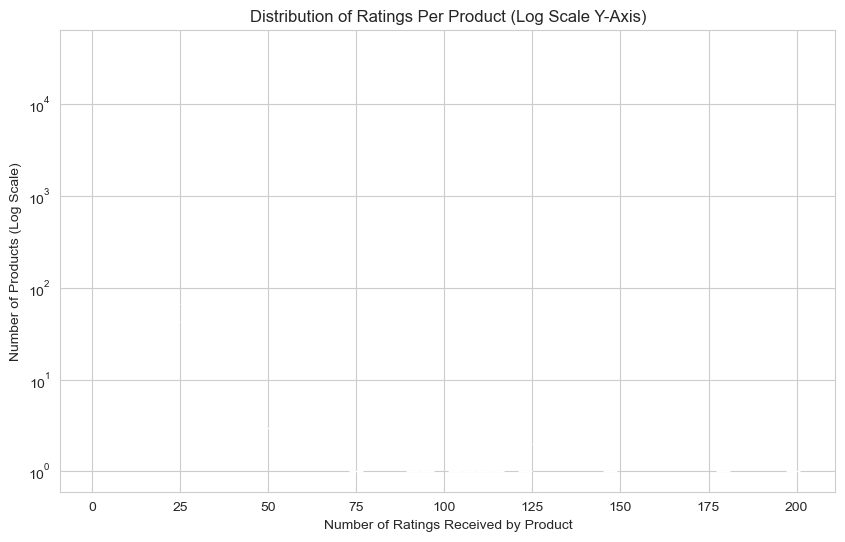

In [62]:
# Visualize the distribution of ratings per product 
plt.figure(figsize=(10, 6))
sns.histplot(product_counts, bins=50, log_scale=(False, True), kde=False, color='lightcoral')
plt.title('Distribution of Ratings Per Product (Log Scale Y-Axis)')
plt.xlabel('Number of Ratings Received by Product')
plt.ylabel('Number of Products (Log Scale)')
plt.show() # In a Jupyter Notebook, use plt.show()

In [57]:
# 8. Sparsity Calculation (Critical for Recommendation Systems)

In [58]:
num_ratings = df.shape[0]
total_possible_ratings = num_users * num_products
sparsity = 1 - (num_ratings / total_possible_ratings)

In [60]:
print("\n--- Sparsity Calculation for User-Item Matrix ---")
print(f"Total number of unique users: {num_users}")
print(f"Total number of unique products: {num_products}")
print(f"Total number of ratings (observed interactions): {num_ratings}")
print(f"Total possible ratings (User-Product Matrix Size): {total_possible_ratings}")
print(f"Sparsity of the User-Item Matrix: {sparsity * 100:.6f}%")
print("\nNOTE: A high sparsity indicates that most users have only rated a small fraction of the available products, which is typical for recommendation datasets and confirms the need for a collaborative filtering approach.")


--- Sparsity Calculation for User-Item Matrix ---
Total number of unique users: 76430
Total number of unique products: 40228
Total number of ratings (observed interactions): 78245
Total possible ratings (User-Product Matrix Size): 3074626040
Sparsity of the User-Item Matrix: 99.997455%

NOTE: A high sparsity indicates that most users have only rated a small fraction of the available products, which is typical for recommendation datasets and confirms the need for a collaborative filtering approach.


## Summary of EDA Results

In [63]:
# Shape: The dataset contains 78,245 ratings.
# Missing Values: There are no missing values in the userid, productid, or rating columns.
# Data Cleaning: The timestamp (initially labeled as date) column was successfully dropped as specified in the project objective.

In [64]:
# Mean Rating: The average rating is approximately 4.01.
# Median Rating: The median rating is 5.0, indicating a strong skew towards positive reviews.
# Distribution: The distribution of ratings is heavily skewed towards higher ratings, particularly 5.0, which is the most frequent rating.

In [65]:
# Unique Users: There are 76,430 unique users.
# Unique Products: There are 40,228 unique products.
# User Activity:-
# The mean number of ratings per user is very low (just over 1 rating per user), suggesting that most users have only rated a single product in this dataset.
# The top users have given a maximum of 8 ratings.
# The distribution plot confirms a long-tail distribution: a huge number of users have given very few ratings, and only a tiny fraction of users are highly active.
# Product Popularity:-
# The mean number of ratings per product is also very low (approximately 1.94).
# The most popular product has received 201 ratings.
# Similar to user activity, the product distribution plot shows a long-tail: most products have received very few ratings, while a few products are highly rated.

In [ ]:
# Total Possible Ratings: 76,430 x 40,228 = 3,074,626,040
# Actual Ratings: 78,245
# Sparsity: 100.00 %, or more precisely, (1 - {78,245}/{3,074,626,040}) x 100% = 99.99745%
# The extremely high sparsity indicates that the dataset is very sparse, which is a common and critical characteristic of datasets used for collaborative filtering. This confirms that the Item-Item Collaborative Filtering approach mentioned in the project objective is an appropriate choice.